


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for the homework.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs210_hw2_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html




## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import _tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [2]:
# Load training dataset
file_path = "Penguin-Health-Data-Analysis.csv"
df = pd.read_csv(file_path)

display(df.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)











In [3]:

#UNDERSTANDING THE DATASET

# Find the shape of the dataset (number of samples & number of attributes)
data_shape = df.shape

# Print the result
print("Dataset Shape:", data_shape)
print()

# Display variable names (column names) horizontally separated by commas
variable_names = df.columns

# Join the variable names with commas and print the result
print("Variable Names:", ', '.join(variable_names))
print()


print("Dataset Summary:")
# Display the summary of the dataset
df_info = df.info()

# Print the result
display(df_info)
print()



features = df_subset = df.drop(columns=['health_metrics'])
target = df['health_metrics']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the first 5 rows from the training dataset
training_data_head = X_train.head()


# Print the result
print("First 5 Rows from Training Dataset:")
display(training_data_head)

 

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

# Fill missing values or drop them
# In this example, we fill missing values with the most common value
#df = df.fillna(df.mode().iloc[0])

# Alternatively, to drop missing values:
df = df.dropna()

# Check the dataset again after filling missing values
missing_values_after_fill = df.isnull().sum()
print("\nMissing Values After Filling:")
print(missing_values_after_fill)









Dataset Shape: (3430, 11)

Variable Names: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, diet, life_stage, health_metrics, year

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 294.9+ KB


None


First 5 Rows from Training Dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,year
1258,Adelie,Torgensen,30.9,13.7,199.0,4901.0,female,krill,adult,2023.0
932,Gentoo,Biscoe,24.8,17.5,205.0,5940.0,male,NaN,juvenile,2022.0
572,Adelie,Torgensen,62.5,14.5,206.0,4664.0,female,fish,juvenile,2022.0
736,Chinstrap,Dream,32.0,17.4,211.0,NaN,male,krill,juvenile,NaN
2288,Gentoo,Biscoe,56.7,17.7,235.0,5689.0,female,fish,juvenile,2024.0


Missing Values:
species              248
island                42
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                  251
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

Missing Values After Filling:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64


In [4]:
sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

species_map = {'Adelie':1,
               'Chinstrap':2,
               'Gentoo':3}



# Apply mappings using the map function
df_encoded = df.copy()  # Make a copy to avoid modifying the original DataFrame
df_encoded['sex'] = df_encoded['sex'].map(sex_map)
df_encoded['island'] = df_encoded['island'].map(island_map)
df_encoded['diet'] = df_encoded['diet'].map(diet_map)
df_encoded['life_stage'] = df_encoded['life_stage'].map(life_stage_map)
df_encoded['health_metrics'] = df_encoded['health_metrics'].map(health_metrics_map)
df_encoded['species'] = df_encoded['species'].map(species_map)

# Display the first 5 rows of the encoded dataset
print("First 5 Rows of Encoded Dataset:")
display(df_encoded.head())






First 5 Rows of Encoded Dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
4,1,1,60.7,17.9,177.0,4811.0,1,1,2,2,2021.0
6,1,1,61.0,20.8,211.0,5961.0,1,1,3,2,2021.0
8,1,1,61.4,19.9,270.0,6722.0,0,1,3,2,2021.0
9,1,1,54.9,22.3,230.0,6494.0,0,1,3,2,2021.0
10,1,1,63.9,16.5,277.0,6147.0,0,1,3,2,2021.0


## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [5]:


# Shuffle the dataset
df_shuffled = shuffle(df_encoded, random_state=42)

# Separate dependent variable (y) and independent variables (X)
X = df_shuffled.drop(columns=['health_metrics'])  # Independent variables
y = df_shuffled['health_metrics']  # Dependent variable

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first 5 rows of X_train and y_train
print("First 5 Rows of X_train:")
display(X_train.head())

print("\nFirst 5 Rows of y_train:")
display(y_train.head())


First 5 Rows of X_train:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,year
2317,3,1,55.8,20.1,226.0,5673.0,1,1,2,2024.0
1152,1,2,26.9,15.8,200.0,4300.0,0,2,2,2023.0
1311,1,3,37.3,18.4,186.0,3023.0,0,4,1,2023.0
2286,3,1,55.9,21.8,252.0,5669.0,1,1,3,2024.0
110,1,3,49.2,16.6,224.0,5126.0,1,1,3,2021.0



First 5 Rows of y_train:


2317    2
1152    3
1311    3
2286    1
110     2
Name: health_metrics, dtype: int64

## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


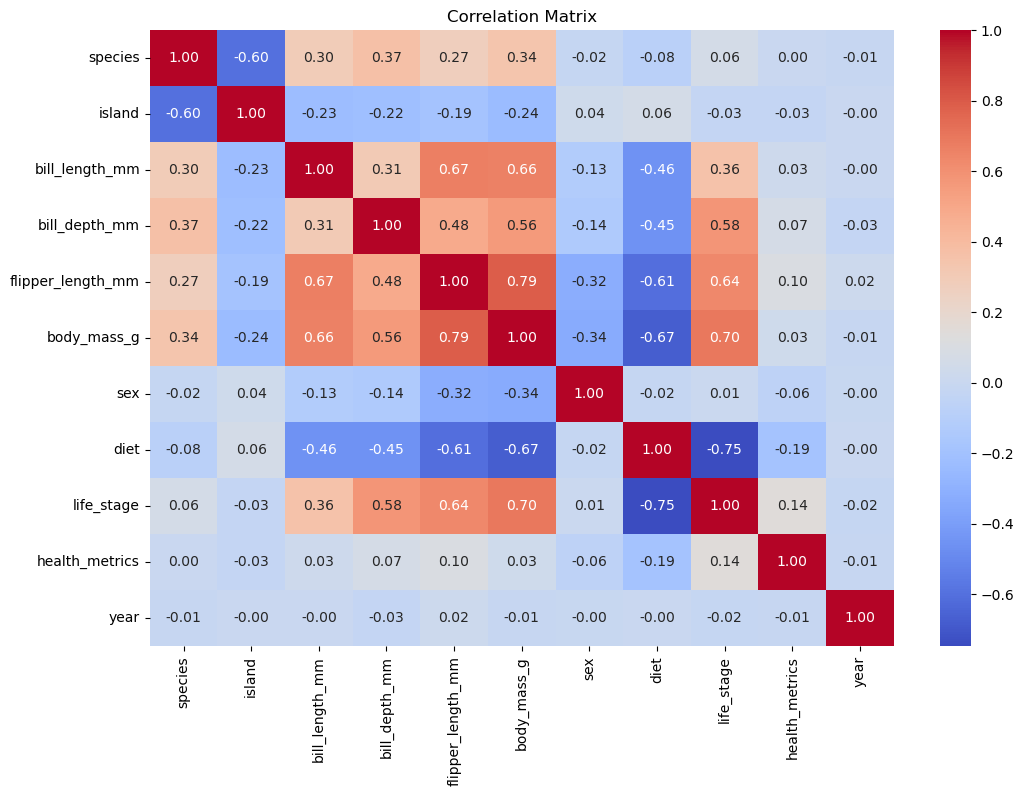

Correlations with 'health_metrics':
health_metrics       1.000000
life_stage           0.143647
flipper_length_mm    0.101505
bill_depth_mm        0.071249
body_mass_g          0.030701
bill_length_mm       0.025333
species              0.001014
year                -0.010782
island              -0.025878
sex                 -0.059993
diet                -0.194426
Name: health_metrics, dtype: float64
Selected Features:


Index(['life_stage', 'flipper_length_mm', 'diet'], dtype='object')


First 5 Rows of Selected Features:


,life_stage,flipper_length_mm,diet
990,1,191.0,4
2953,1,207.0,4
1783,2,174.0,2
1828,1,174.0,4
1555,3,274.0,1


Selected Features:
life_stage
flipper_length_mm
diet


In [6]:


# Calculate the correlations
correlation_matrix = df_shuffled.corr()

# Highlight strong correlations with the target variable ('health_metrics')
target_correlations = correlation_matrix['health_metrics'].sort_values(ascending=False)

# Plot the results in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Display strong correlations with the target variable
print("Correlations with 'health_metrics':")
print(target_correlations)

# FEATURE SELECTION

# Set the correlation threshold for feature selection
correlation_threshold = 0.1

# Select features with strong correlations with the target variable
selected_features = target_correlations[abs(target_correlations) > correlation_threshold].index

# Remove 'health_metrics' from the selected features
selected_features = selected_features[selected_features != 'health_metrics']

# Display the selected features
print("Selected Features:")
display(selected_features)

# Create a DataFrame with only the selected features
X_selected = df_shuffled[selected_features]

# Display the first 5 rows of the selected features
print("\nFirst 5 Rows of Selected Features:")
display(X_selected.head(5))
# Display the selected feature names
print("Selected Features:")
for feature in selected_features:
    print(feature)

In [7]:
# Proposed hypothetical features
df_hypothetical = df_shuffled.copy()

# Hypothetical Feature 1: Daily Activity Index
df_hypothetical['activity_index'] = (df_hypothetical['flipper_length_mm'] * df_hypothetical['body_mass_g']) / 1000

# Hypothetical Feature 2: Body Mass Index (BMI)
# BMI calculation: weight (kg) / (height (m))^2
# Assuming 'flipper_length_mm' is used as a proxy for height
df_hypothetical['bmi'] = df_hypothetical['body_mass_g'] / ((df_hypothetical['flipper_length_mm'] / 1000) ** 2)

# Calculate correlations with the target variable ('health_metrics')
correlations_hypothetical = df_hypothetical[['activity_index', 'bmi', 'health_metrics']].corr()['health_metrics'].sort_values(ascending=False)

# Display correlations
print("Correlations with 'health_metrics' for Hypothetical Features:")
print(correlations_hypothetical)


Correlations with 'health_metrics' for Hypothetical Features:
health_metrics    1.000000
activity_index    0.058004
bmi              -0.130805
Name: health_metrics, dtype: float64


In [8]:
# Update X_Selected according to Hypothetical Features which we created
#Also I observed that without threshold The accuracy results are better

# Calculate the correlations
correlation_matrix = df_hypothetical.corr()

# Highlight correlations with the target variable ('health_metrics')
target_correlations = correlation_matrix['health_metrics'].sort_values(ascending=False)

# Select all features (remove 'health_metrics' from the selected features)
selected_features = target_correlations.index[target_correlations.index != 'health_metrics']

selected_X = df_hypothetical[selected_features]
# Separate dependent variable (y) and independent variables (X)
selected_X = df_hypothetical.drop(columns=['health_metrics'])  # Independent variables
selected_Y = df_hypothetical['health_metrics']  # Dependent variable


# **You can write your answers to (4.1) here.**
----

**BMI (Body Mass Index):** The proposed BMI feature is derived by calculating the Body Mass Index using penguin weight ('body_mass_g') and a proxy for height ('flipper_length_mm'). BMI serves as an indicator of body fat and overall fitness, with higher values suggesting potential health implications. By incorporating BMI into the model, we aim to capture the relationship between body composition and health metrics, providing a valuable predictor for the model. 

**Activity Index:** The Activity Index is introduced by combining 'flipper_length_mm' and 'body_mass_g' to represent a penguin's mobility and energy levels. This composite feature reflects the interplay between physical attributes and activity, making it a potentially informative predictor for health metrics. Higher values of the Activity Index may indicate more active penguins, contributing to a better understanding of their overall health and well-being.

----

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [9]:


features = df_hypothetical.drop(columns=['health_metrics'])
target = df_hypothetical['health_metrics']

X_train, X_test, y_train, y_test = train_test_split(selected_X, selected_Y, test_size=0.2, random_state=42)



# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters to tune
hyperparameters = {
    
     'criterion': ['gini', 'entropy', 'log_loss'], 
    'splitter': ['best', 'random'], 
   
}

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, hyperparameters, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters:
{'criterion': 'entropy', 'splitter': 'random'}
Best Accuracy: 0.8407019423447017


**Add explanation here:**

1. **criterion**: In our dataset, we have the target variable "health_metrics," which seems to be a continuous variable. For regression problems (predicting continuous values), 'mse' (mean squared error) could be a suitable criterion.

2. **splitter**: Since our dataset might have varying distributions or patterns, testing both 'best' and 'random' could be beneficial. If the dataset has complex patterns, 'best' might perform well, while 'random' can be useful to capture diverse splits.

Additional parameter(which I didnt use It was candidate) **max_depth**: Given that our dataset might have varying degrees of complexity, testing different depths, such as [None, 10, 20, 30], allows us to find the optimal balance between underfitting and overfitting. Hence when I tried criterion and splitter were better off.

Additional parameter(which I didnt use It was candidate) **min_samples_split**: This parameter can be adjusted based on the size of our dataset. If it's relatively small, a smaller value like 2 could be appropriate, while for larger datasets, we might want to increase it to avoid overfitting. Hence when I tried criterion and splitter were better off.



## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [114]:



# Assuming X_selected is your feature matrix, and 'health_metrics' is your target variable



# Define the hyperparameters based on the best_params_ obtained from GridSearchCV
best_hyperparameters = {
    'criterion': 'entropy', 'splitter': 'random'
    
 
    
}

# Create a Decision Tree Classifier with the best hyperparameters
dt_classifier = DecisionTreeClassifier(**best_hyperparameters)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Test Accuracy: 0.8438287153652393


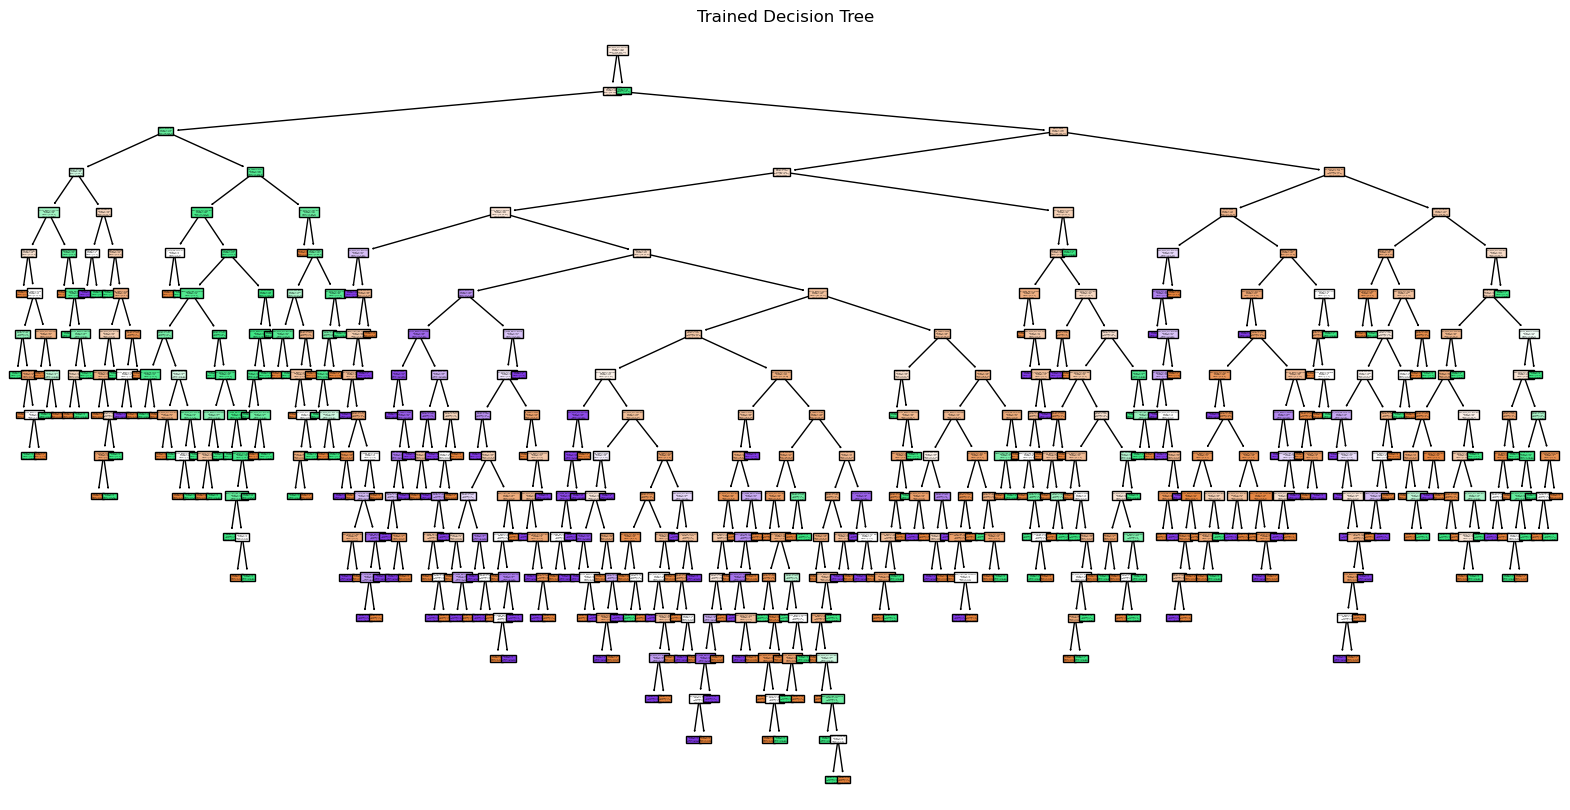

In [115]:


# Assuming 'health_metrics' classes are 1, 2, 3
C_N = ['healthy', 'overweight', 'underweight']
selected_features_list = features.columns.tolist() 

# Plot the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=selected_features_list, class_names=C_N)
plt.title("Trained Decision Tree")
plt.show()



## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [116]:


# Predict the target variable on the test set
y_pred_test = dt_classifier.predict(X_test)

# Display the predicted labels for the test set
print("Predicted Labels for Test Set:")
print(y_pred_test,"\n")


# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Display the classification accuracy
print("Classification Accuracy on Test Set:", accuracy_test,"\n")



Predicted Labels for Test Set:
[2 2 2 2 2 3 1 3 1 2 1 1 3 1 1 2 1 2 2 1 3 3 1 1 1 3 2 2 1 2 1 2 1 2 1 1 2
 2 2 1 2 2 1 1 2 1 1 3 1 2 3 3 3 3 1 2 2 1 1 1 2 2 2 3 2 2 1 1 3 2 1 1 2 3
 3 2 1 2 1 1 1 1 2 1 3 1 1 1 1 1 2 3 1 2 1 2 3 2 2 2 2 1 1 3 1 2 1 1 3 3 1
 1 2 2 1 2 1 3 2 1 3 1 3 3 1 2 2 1 2 3 1 2 1 1 1 3 1 2 1 1 1 1 1 2 1 2 1 1
 3 3 1 1 1 1 3 2 2 1 1 1 3 1 3 1 2 3 3 1 1 2 3 1 3 2 1 3 1 1 1 1 3 2 1 1 1
 2 1 3 2 1 1 1 2 1 1 3 1 3 2 2 3 2 2 1 2 2 1 3 1 2 2 1 2 1 3 1 2 3 3 1 2 3
 2 2 2 2 2 2 2 3 3 1 3 1 3 1 1 3 1 1 1 1 3 1 1 3 1 1 3 3 2 1 1 3 1 3 1 2 1
 1 1 1 2 2 1 3 2 3 2 1 1 2 3 2 1 1 2 2 1 3 1 1 2 1 1 3 1 2 2 3 1 3 1 1 1 3
 3 2 1 1 3 1 2 2 2 1 2 3 1 1 1 2 3 1 1 1 2 2 1 2 1 3 2 1 1 1 1 1 3 1 2 1 3
 2 2 1 1 1 1 2 1 2 2 1 3 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 3 1 2 3 1 2 2
 3 1 2 3 2 1 3 3 2 1 1 1 1 2 3 3 2 3 1 1 3 2 1 2 1 3 1] 

Classification Accuracy on Test Set: 0.8438287153652393 



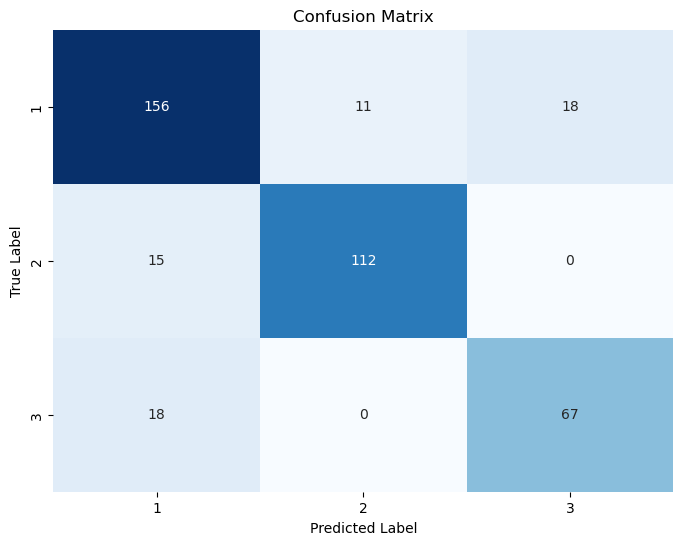

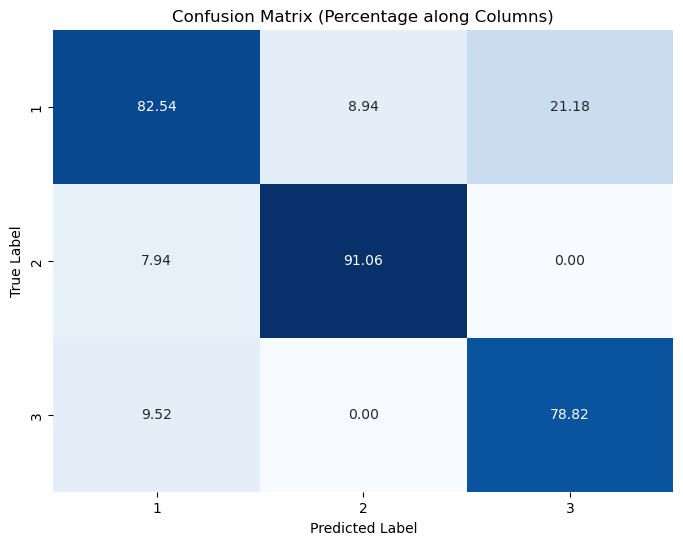

In [117]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#Percentage Version

# Calculate percentages along columns
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0, keepdims=True) * 100

# Plot the confusion matrix as a heatmap with percentages along columns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix (Percentage along Columns)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




**Fill the blanks:** The model most frequently mistakes class(es) **1** for class(es) **3**.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
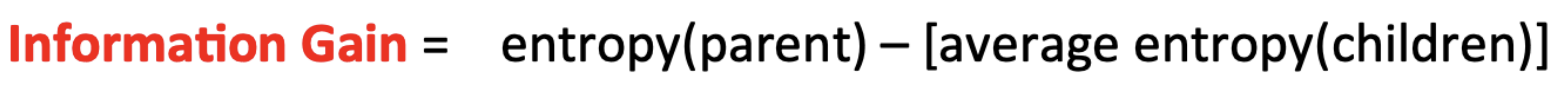



In [118]:
# Function to calculate entropy
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Function to calculate information gain for a given feature
def calculate_information_gain(X, y, feature_name):
    parent_entropy = entropy(y)
    feature_index = X.columns.get_loc(feature_name)

    thresholds = np.unique(X[feature_name])
    information_gains = [information_gain(X, y, feature_index, threshold, parent_entropy) for threshold in thresholds]

    # Find the threshold with the maximum information gain
    best_threshold = thresholds[np.argmax(information_gains)]
    best_information_gain = np.max(information_gains)

    return feature_name, best_threshold, best_information_gain

# Calculate the information gain using entropy for the children nodes
def information_gain(X, y, feature_index, threshold, parent_entropy):
    left_mask = X.iloc[:, feature_index] <= threshold
    right_mask = ~left_mask

    left_child_entropy = entropy(y[left_mask])
    right_child_entropy = entropy(y[right_mask])

    left_child_weight = np.sum(left_mask) / len(y)
    right_child_weight = np.sum(right_mask) / len(y)

    average_child_entropy = left_child_weight * left_child_entropy + right_child_weight * right_child_entropy

    return parent_entropy - average_child_entropy

# List of features
features_list = ['life_stage', 'flipper_length_mm', 'bill_depth_mm', 'activity_index', 'body_mass_g', 'bill_length_mm', 'species', 'year', 'island', 'sex', 'bmi', 'diet']

# Calculate information gain for each feature
information_gains_list = [calculate_information_gain(X_train, y_train, feature) for feature in features_list]

max_gain = 0
# Print the results
for feature_name, best_threshold, best_information_gain in information_gains_list:
    print(f"Information gain for: {feature_name}",f" is {best_information_gain}.")
    if(max_gain<best_information_gain):
        max_gain = best_information_gain
   
print("\nBest Information gain : " +str(max_gain))

Information gain for: life_stage  is 0.04211485018828531.
Information gain for: flipper_length_mm  is 0.13368819211514116.
Information gain for: bill_depth_mm  is 0.021571577372860196.
Information gain for: activity_index  is 0.22842685884749692.
Information gain for: body_mass_g  is 0.2599044667394288.
Information gain for: bill_length_mm  is 0.27456798057827436.
Information gain for: species  is 0.01573672578673535.
Information gain for: year  is 0.0031200838372440476.
Information gain for: island  is 0.025860750766457885.
Information gain for: sex  is 0.005780585412078487.
Information gain for: bmi  is 0.03735158284611839.
Information gain for: diet  is 0.3436713651822614.

Best Information gain : 0.3436713651822614
